___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [315]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from IPython.display import SVG
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [316]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [317]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [318]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [319]:
x_train.shape

(60000, 28, 28)

In [320]:
y_train.shape

(60000,)

In [321]:
x_test.shape

(10000, 28, 28)

In [322]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [323]:
x_train.shape

(54000, 28, 28)

In [324]:
x_val.shape

(6000, 28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

**Class Names:**

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [325]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [326]:
X_train[50]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

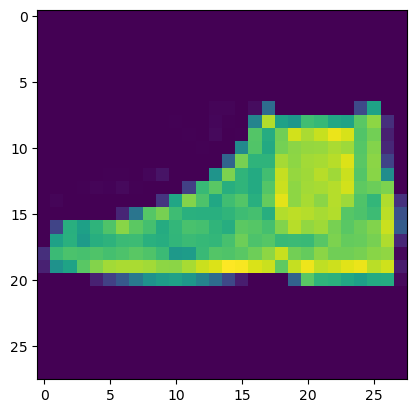

In [327]:
plt.imshow(X_train[50])
plt.show()

In [329]:
y_train

array([5, 2, 9, ..., 6, 6, 1], dtype=uint8)

In [330]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5403, 5392, 5389, 5413, 5373, 5379, 5381, 5450, 5410, 5410],
       dtype=int64))

In [331]:
y_train[0]

5

In [332]:
classes[y_train[0]]

'Sandal'

In [333]:
y_train[4999]

9

In [334]:
classes[y_train[4999]]

'Ankle boot'

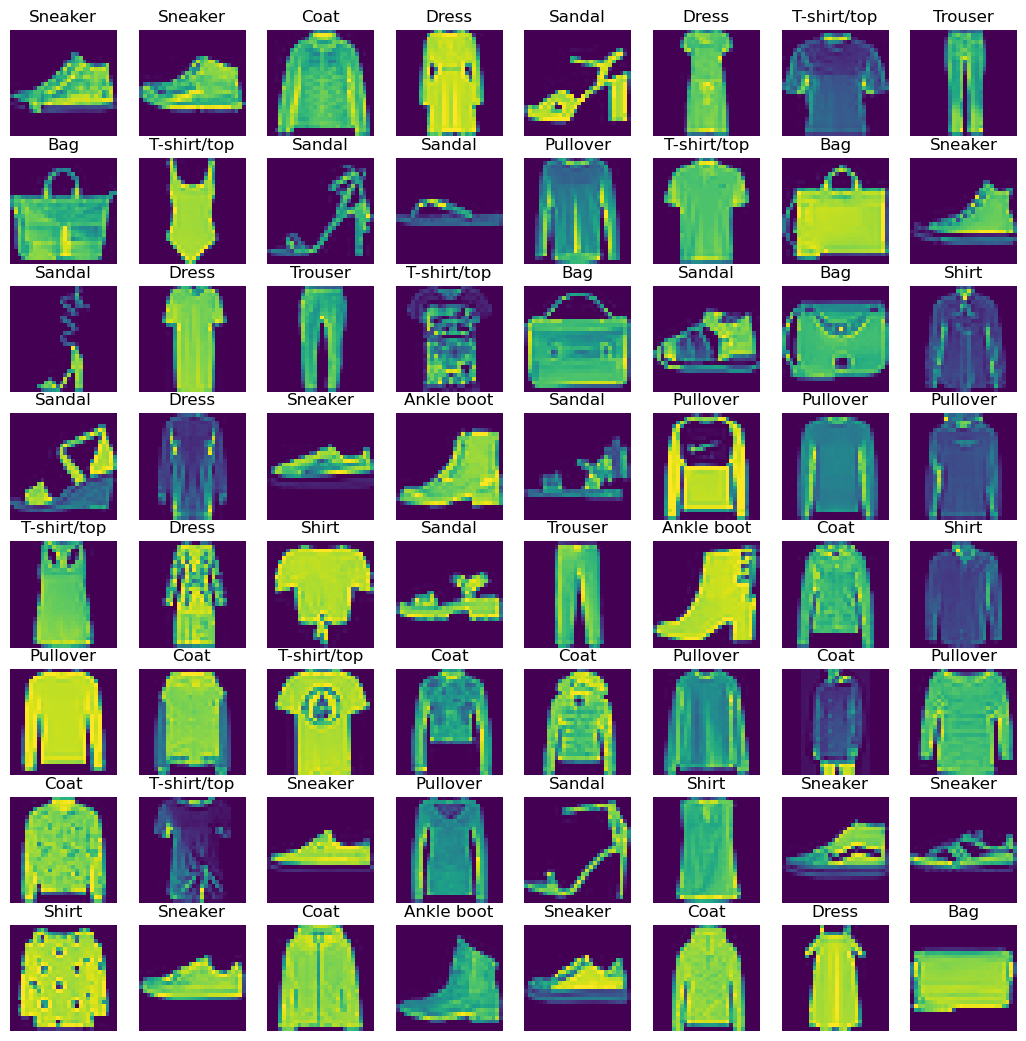

In [336]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(X_train[rand_index])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [337]:
x_train.max()

255

In [338]:
# Normalize image pixels
x_train = x_train.astype("float32")
x_val = x_val.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_val /= 255
x_test /= 255

In [339]:
x_train.min()

0.0

In [340]:
x_train.max()

1.0

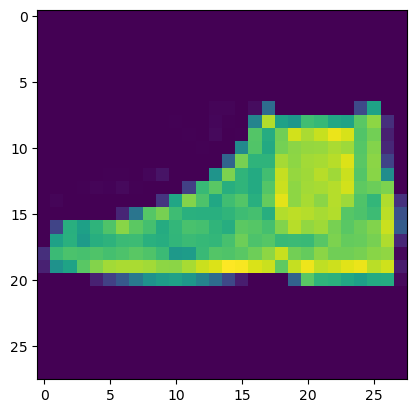

In [341]:
plt.imshow(x_train[50])
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [342]:
x_train.shape, x_test.shape

((54000, 28, 28), (10000, 28, 28))

In [343]:
np.expand_dims(x_train, 3).shape

(54000, 28, 28, 1)

In [344]:
X_train = np.expand_dims(x_train, 3)
X_val =  np.expand_dims(x_val, 3)
X_test = np.expand_dims(x_test, 3)

In [345]:
X_val.shape

(6000, 28, 28, 1)

In [346]:
X_train.shape, X_val.shape, X_test.shape

((54000, 28, 28, 1), (6000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [347]:
from tensorflow.keras.utils import to_categorical

In [348]:
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(54000, 10)

In [349]:
y_train[9]

1

In [350]:
Y_train[9]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [351]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [352]:
model = Sequential()

model.add(
    Conv2D(filters=28, kernel_size=(3, 3), padding="same", input_shape=(28, 28, 1), activation="relu")
)  # stride = 1

model.add(MaxPool2D(pool_size=(2, 2), strides = (1,1)))  # stride = pool size

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [353]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 27, 27, 28)        0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 20412)             0         
                                                                 
 dense_23 (Dense)            (None, 128)               2612864   
                                                                 
 dense_24 (Dense)            (None, 10)                1290      
                                                                 
Total params: 2614434 (9.97 MB)
Trainable params: 2614434 (9.97 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [354]:
from tensorflow.keras.callbacks import EarlyStopping

In [313]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", patience=4, restore_best_weights=True
)

In [355]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, Y_val),
    callbacks=[early_stop],
)

Epoch 1/20
1688/1688 [==============================] - 75s 44ms/step - loss: 0.3966 - accuracy: 0.8613 - val_loss: 0.2885 - val_accuracy: 0.8932
Epoch 2/20
1688/1688 [==============================] - 74s 44ms/step - loss: 0.2619 - accuracy: 0.9054 - val_loss: 0.2726 - val_accuracy: 0.8968
Epoch 3/20
1688/1688 [==============================] - 78s 46ms/step - loss: 0.2187 - accuracy: 0.9204 - val_loss: 0.2590 - val_accuracy: 0.9050
Epoch 4/20
1688/1688 [==============================] - 77s 45ms/step - loss: 0.1891 - accuracy: 0.9315 - val_loss: 0.2500 - val_accuracy: 0.9117
Epoch 5/20
1688/1688 [==============================] - 73s 43ms/step - loss: 0.1630 - accuracy: 0.9402 - val_loss: 0.2645 - val_accuracy: 0.9103
Epoch 6/20
1688/1688 [==============================] - 74s 44ms/step - loss: 0.1427 - accuracy: 0.9485 - val_loss: 0.2679 - val_accuracy: 0.9077
Epoch 7/20
1688/1688 [==============================] - 79s 47ms/step - loss: 0.1270 - accuracy: 0.9550 - val_loss: 0.2636 -

In [356]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.396646,0.861259,0.288453,0.893167
1,0.261867,0.905407,0.272643,0.896833
2,0.218700,0.920407,0.259045,0.905000
3,0.189144,0.931481,0.249989,0.911667
4,0.162990,0.940222,0.264466,0.910333


**TASK 7: Plot values of metrics you used in your model.**

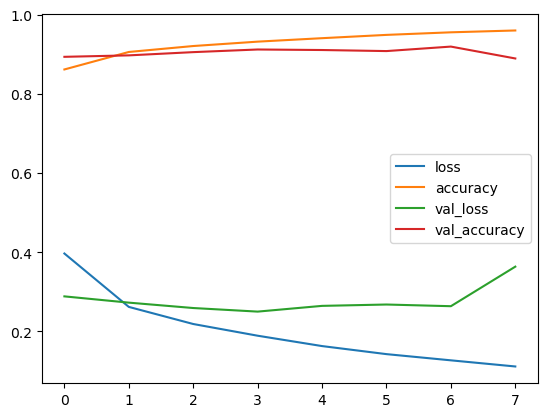

In [357]:
loss_df.plot();

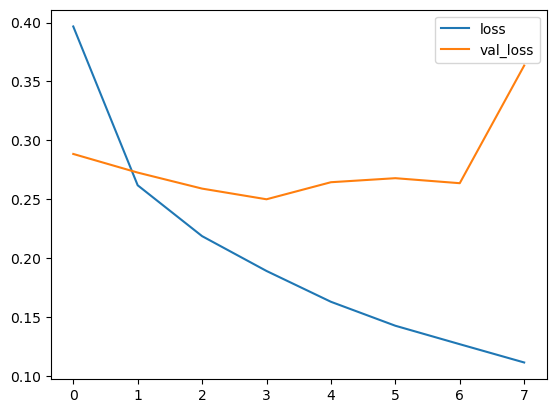

In [358]:
loss_df[["loss", "val_loss"]].plot();

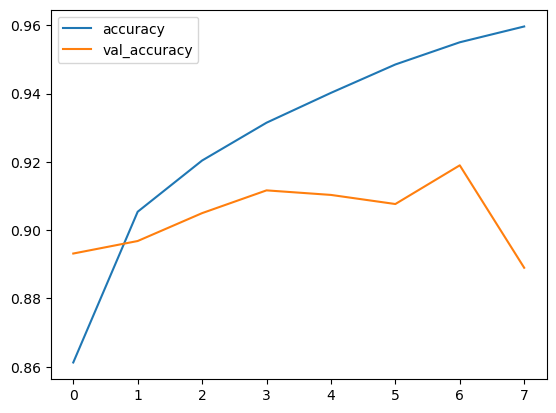

In [359]:
loss_df[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [360]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [361]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2726 - accuracy: 0.9089


[0.2725726366043091, 0.9089000225067139]

In [362]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2725726366043091
Test accuracy: 0.9089000225067139


In [363]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 2s 5ms/step


array([[4.4492663e-07, 1.7248774e-09, 9.4019683e-08, ..., 4.6743364e-05,
        1.3014303e-08, 9.9994493e-01],
       [5.9012558e-07, 2.5678774e-14, 9.9998689e-01, ..., 2.6225121e-11,
        3.3106182e-10, 6.5657435e-13],
       [6.7006022e-07, 9.9999642e-01, 3.0397299e-08, ..., 6.2519399e-11,
        1.2933996e-09, 9.0613662e-11],
       ...,
       [1.5920126e-07, 9.4825385e-13, 3.1185155e-06, ..., 4.1506215e-08,
        9.9984217e-01, 6.2817440e-10],
       [6.3478112e-08, 9.9994278e-01, 2.7989615e-09, ..., 1.9046219e-11,
        1.2095853e-10, 4.4121215e-08],
       [9.5493306e-04, 1.8575789e-05, 2.8531759e-03, ..., 4.5888466e-01,
        1.1074676e-02, 2.6234902e-02]], dtype=float32)

In [364]:
pred_prob.shape

(10000, 10)

In [365]:
pred_prob[0]

array([4.4492663e-07, 1.7248774e-09, 9.4019683e-08, 3.4864620e-09,
       2.2566315e-08, 7.7360037e-06, 8.3059490e-08, 4.6743364e-05,
       1.3014303e-08, 9.9994493e-01], dtype=float32)

In [366]:
np.argmax(pred_prob[0])

9

In [367]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [368]:
y_pred.shape

(10000,)

In [369]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.87      0.85      1000
           3       0.86      0.95      0.90      1000
           4       0.91      0.79      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.75      0.78      0.76      1000
           7       0.94      0.99      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [370]:
print(confusion_matrix(y_test, y_pred))

[[834   1  14  38   2   1 103   0   7   0]
 [  1 967   1  24   1   0   5   0   1   0]
 [ 17   0 873  14  36   1  59   0   0   0]
 [  6   3   7 950  10   0  23   0   1   0]
 [  1   1  98  42 786   1  70   0   1   0]
 [  0   0   0   0   0 969   0  19   0  12]
 [ 75   1  65  36  31   0 780   0  12   0]
 [  0   0   0   0   0   3   0 986   0  11]
 [  1   0   1   6   0   1   2   4 985   0]
 [  0   0   0   0   0   5   1  35   0 959]]


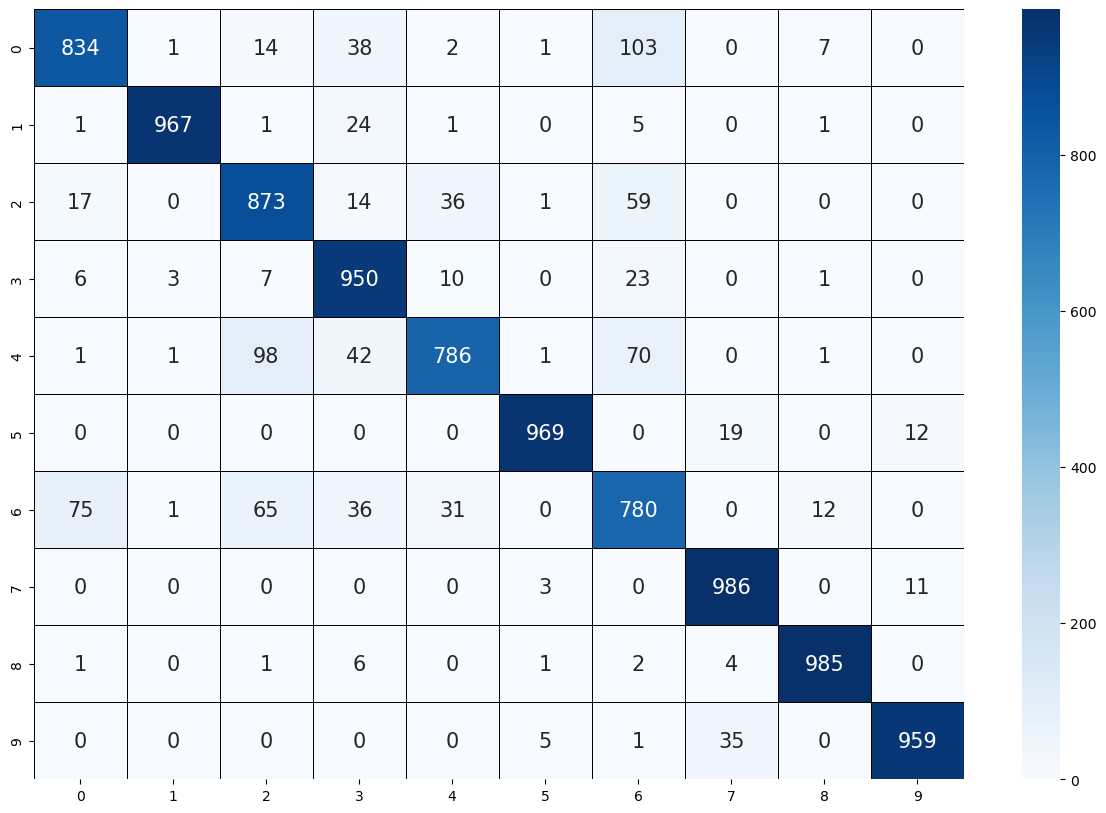

In [371]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [372]:
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [373]:
np.not_equal(y_test, y_pred).sum()

911

In [374]:
np.equal(y_test, y_pred).sum()

9089

# Modeling-2

In [416]:
model = Sequential()

model.add(
    Conv2D(
        filters=28,
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(28, 28, 1),
        padding="same",
    )
)
model.add(Conv2D(filters=56, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=112, kernel_size=(3, 3), activation="relu"))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [417]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 28)        280       
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 56)        14168     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 14, 56)        0         
 ng2D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 56)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 12, 12, 112)       56560     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 6, 6, 112)         0         
 ng2D)                                               

In [418]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", patience=4, restore_best_weights=True
)

In [419]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, Y_val),
    callbacks=[early_stop],
)

Epoch 1/50
1688/1688 [==============================] - 102s 60ms/step - loss: 0.4709 - accuracy: 0.8262 - val_loss: 0.3212 - val_accuracy: 0.8818
Epoch 2/50
1688/1688 [==============================] - 101s 60ms/step - loss: 0.3014 - accuracy: 0.8890 - val_loss: 0.2662 - val_accuracy: 0.9052
Epoch 3/50
1688/1688 [==============================] - 106s 63ms/step - loss: 0.2619 - accuracy: 0.9017 - val_loss: 0.2480 - val_accuracy: 0.9110
Epoch 4/50
1688/1688 [==============================] - 105s 62ms/step - loss: 0.2348 - accuracy: 0.9130 - val_loss: 0.2174 - val_accuracy: 0.9193
Epoch 5/50
1688/1688 [==============================] - 106s 63ms/step - loss: 0.2202 - accuracy: 0.9186 - val_loss: 0.2379 - val_accuracy: 0.9105
Epoch 6/50
1688/1688 [==============================] - 109s 64ms/step - loss: 0.2041 - accuracy: 0.9240 - val_loss: 0.2153 - val_accuracy: 0.9197
Epoch 7/50
1688/1688 [==============================] - 1148s 680ms/step - loss: 0.1957 - accuracy: 0.9272 - val_loss:

In [420]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.470945,0.826204,0.321191,0.881833
1,0.301366,0.889037,0.266151,0.905167
2,0.261859,0.901741,0.248017,0.911000
3,0.234800,0.912982,0.217421,0.919333
4,0.220199,0.918611,0.237877,0.910500


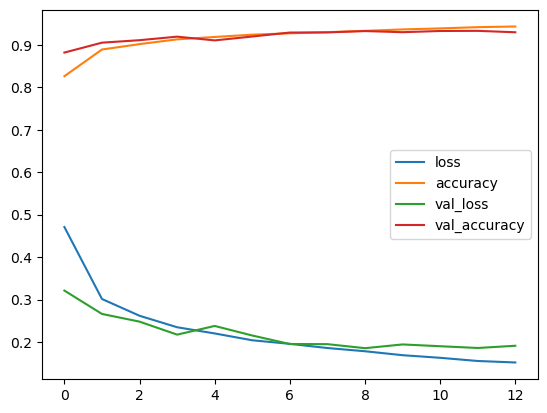

In [422]:
loss_df.plot();

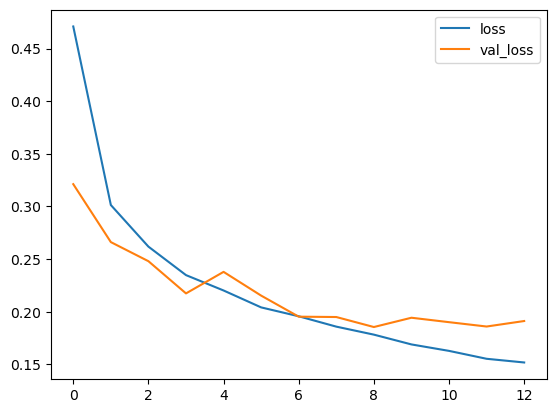

In [423]:
loss_df[["loss", "val_loss"]].plot();

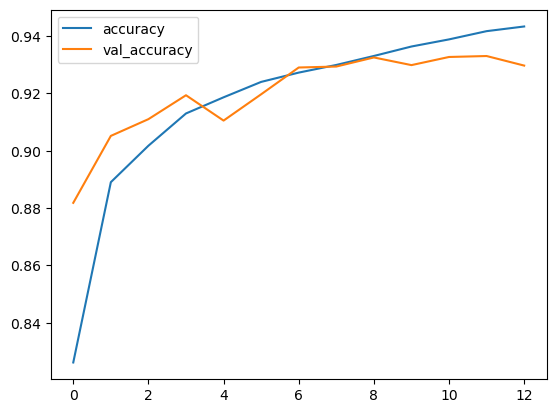

In [424]:
loss_df[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

In [421]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2078 - accuracy: 0.9265


[0.20779109001159668, 0.9265000224113464]

In [425]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.20779109001159668
Test accuracy: 0.9265000224113464


In [427]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 3s 9ms/step


array([[6.0397167e-09, 5.5699595e-10, 6.8192882e-11, ..., 2.9500936e-05,
        1.1010512e-10, 9.9995315e-01],
       [8.0713829e-07, 1.6785960e-13, 9.9981791e-01, ..., 9.4012576e-12,
        1.9486484e-08, 2.8123069e-15],
       [2.8674487e-08, 1.0000000e+00, 3.5615833e-10, ..., 8.2820225e-13,
        5.5574063e-08, 7.3065062e-16],
       ...,
       [1.4164863e-14, 2.6900635e-19, 5.7491607e-15, ..., 3.5065407e-17,
        1.0000000e+00, 6.1122414e-18],
       [1.1743309e-07, 9.9999940e-01, 6.7677526e-09, ..., 4.5854650e-11,
        7.5602768e-09, 3.6954088e-13],
       [4.0978230e-05, 2.1759386e-07, 5.8964659e-05, ..., 1.4017435e-02,
        1.4791616e-03, 2.4109636e-04]], dtype=float32)

In [428]:
np.argmax(pred_prob[0])

9

In [429]:
pred_prob[0]

array([6.0397167e-09, 5.5699595e-10, 6.8192882e-11, 3.9769500e-11,
       2.0089826e-12, 1.7311739e-05, 3.0587122e-10, 2.9500936e-05,
       1.1010512e-10, 9.9995315e-01], dtype=float32)

In [430]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [431]:
y_pred.shape

(10000,)

In [432]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.90      0.89      0.89      1000
           3       0.92      0.94      0.93      1000
           4       0.88      0.90      0.89      1000
           5       0.98      0.99      0.98      1000
           6       0.79      0.76      0.77      1000
           7       0.96      0.99      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



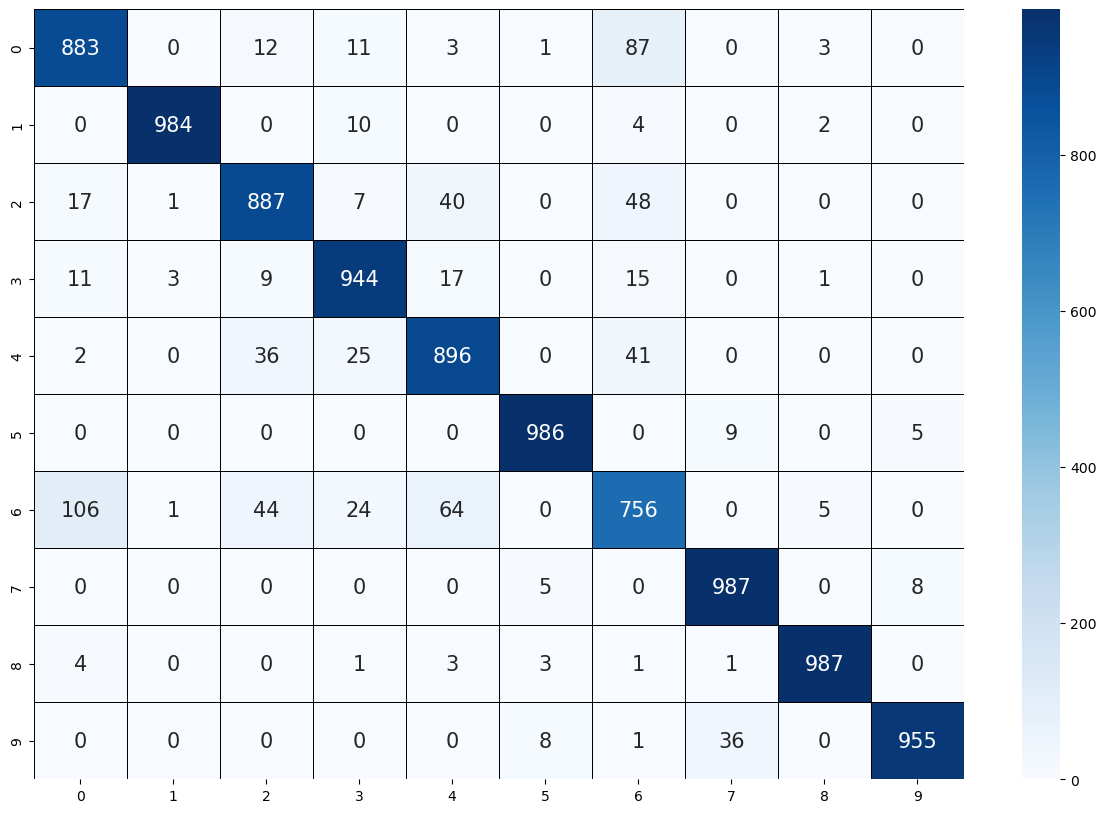

In [433]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [434]:
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [435]:
np.not_equal(y_test, y_pred).sum()

735

In [436]:
np.equal(y_test, y_pred).sum()

9265

## Prediction

In [437]:
my_number = X_test[50]

In [438]:
my_number.shape

(28, 28, 1)

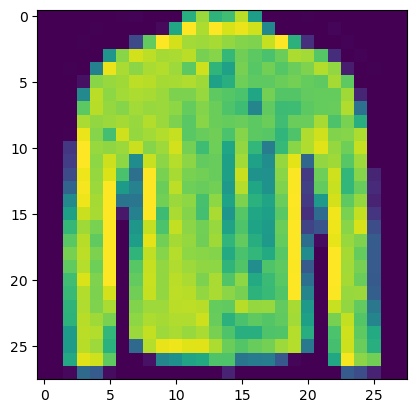

In [439]:
plt.imshow(my_number)
plt.show()

In [440]:
np.expand_dims(my_number, 0).shape

(1, 28, 28, 1)

In [441]:
pred_prob = model.predict(np.expand_dims(my_number, 0))
pred_prob

1/1 [==============================] - 0s 17ms/step


array([[1.8229950e-04, 3.6686569e-09, 2.1607482e-03, 2.8036109e-06,
        9.1819674e-01, 1.2332211e-08, 7.9457201e-02, 1.4413961e-07,
        7.3205186e-08, 7.4926049e-08]], dtype=float32)

In [442]:
y_pred = np.argmax(pred_prob)
y_pred

4

In [445]:
classes[y_pred]

'Coat'

In [446]:
model.save("cnn_ass_2.h5")

In [447]:
model = tf.keras.models.load_model("cnn_ass_2.h5")

In [494]:
X_test[111].shape

(28, 28, 1)

In [495]:
np.expand_dims(X_test[111], axis=0).shape

(1, 28, 28, 1)

In [496]:
pred = model.predict(np.expand_dims(X_test[111], axis=0))

1/1 [==============================] - 0s 18ms/step


In [497]:
np.argmax(pred)

5

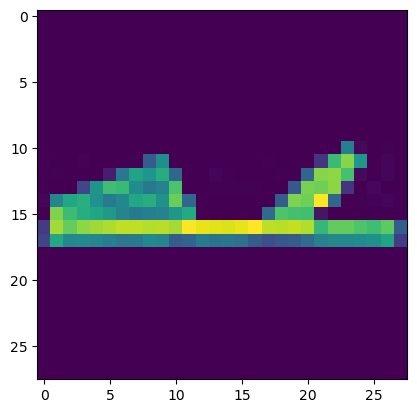

In [498]:
plt.imshow(X_test[111])
plt.show()

In [500]:
classes[5]

'Sandal'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___